# HR Analytics DATA 
Sourced From [Kaggle Dataset- Employee Attrition and Factors](https://www.kaggle.com/datasets/thedevastator/employee-attrition-and-factors)

In [1]:
#Senbagaraman - https://github.com/senbagaraman04/ml-basics/tree/main/2023

### Import Libraries

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


### Read the Data

In [3]:
df = pd.read_csv('./HR_Analytics.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.shape

(1470, 35)

### Find any missing values


In [5]:
df.isnull().count()

Age                         1470
Attrition                   1470
BusinessTravel              1470
DailyRate                   1470
Department                  1470
DistanceFromHome            1470
Education                   1470
EducationField              1470
EmployeeCount               1470
EmployeeNumber              1470
EnvironmentSatisfaction     1470
Gender                      1470
HourlyRate                  1470
JobInvolvement              1470
JobLevel                    1470
JobRole                     1470
JobSatisfaction             1470
MaritalStatus               1470
MonthlyIncome               1470
MonthlyRate                 1470
NumCompaniesWorked          1470
Over18                      1470
OverTime                    1470
PercentSalaryHike           1470
PerformanceRating           1470
RelationshipSatisfaction    1470
StandardHours               1470
StockOptionLevel            1470
TotalWorkingYears           1470
TrainingTimesLastYear       1470
WorkLifeBa

 1470 rows with 35 columns 

In [6]:
#List all the columns in the file 
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

### Find the Columns with numbers and Strings 

In [7]:

# def findCOlumnTypes():
#     int_columns = []
#     object_columns = []
#     for col in df.columns:
#         if (df[col].dtype ==  np.int64):
#              int_columns.append(df[col].name)
#         else:
#             object_columns.append(df[col].name)

#     print(int_columns)
#     print("***************")
#     print(object_columns)


In [8]:
df.dtypes
#findCOlumnTypes()

cat_coulmns  = df.select_dtypes(['object']).columns

num_coulmns  = df.select_dtypes(['int64']).columns

print(cat_coulmns)
print(num_coulmns)


Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')
Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


### Find all the values present in the categorical columns

In [9]:
for col in cat_coulmns:
    print(df[col].value_counts())
    print("**************")

No     1233
Yes     237
Name: Attrition, dtype: int64
**************
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
**************
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
**************
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
**************
Male      882
Female    588
Name: Gender, dtype: int64
**************
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64
**************
Married     673
Single      470
Divorced    327
Name: MaritalSt

Table compile from running the above code ```df[cat_coulmns].value_counts()```

| Column Name | Values and Count |
|-----|----|
| Attrition | No: 1233 Yes: 237 |
| BusinessTravel | Travel_Rarely  1043::Travel_Frequently 277::Non-Travel            150|
| Department |R&D 961::Sales 446::HR 63|
| EducationField | Life Sciences  606::Medical 464::Marketing  159::Technical Degree 132::Other 82::HR 27 |
| Gender | M 882::F 588|
| JobRole | Sales Executive 326::Research Scientist  292::Laboratory Technician  259::Manufacturing Director  145::Healthcare Representative    131::Manager 102::Sales 83::Research Director  80::HR 52 |
|MaritalStatus| M 673:: S 470::D 327|
|OverTime|No  1054::Yes 416|


### Encoding

In [10]:
# Attrition Column: 
#df[cat_coulmns] = df[cat_coulmns].apply(lambda x: pd.factorize(x)[0])

# Take one row and find the columns

#print(df.head())

# from sklearn.preprocessing import OneHotEncoder
# onehotencoder = OneHotEncoder()

# transformed_data = onehotencoder.fit_transform(df[cat_coulmns])


# # the above transformed_data is an array so convert it to dataframe
# encoded_data = pd.DataFrame(transformed_data, index=df.index)


# # now concatenate the original data and the encoded data using pandas
# df = pd.concat([df, encoded_data], axis=1)



 



In [11]:
# print(df.head())

In [12]:
for col in cat_coulmns:
    print(df[col].unique())
    print("**************")

['Yes' 'No']
**************
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
**************
['Sales' 'Research & Development' 'Human Resources']
**************
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
**************
['Female' 'Male']
**************
['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
**************
['Single' 'Married' 'Divorced']
**************
['Y']
**************
['Yes' 'No']
**************


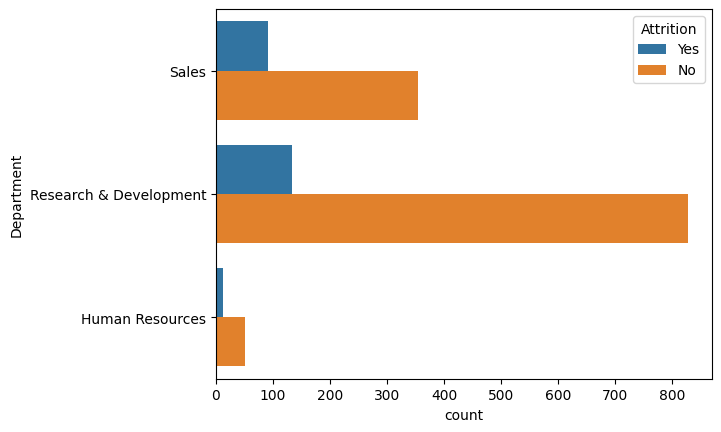

In [13]:
sns.countplot(y = 'Department', hue = 'Attrition', data = df)
plt.show()

In [14]:
from sklearn.preprocessing import LabelEncoder


def convertToNumericalCol(col_name):
    print("Starting to convert: " , col_name)
    le = LabelEncoder()
    label = le.fit_transform(df[col_name])
    df.drop(col_name,axis=1, inplace=True)
    df[col_name]= label

### Convert the Catergorical to Numerical Column : LabelEncoder
        Using ```LabelEncoder``` convert the categorical column to numerical column.

In [15]:

for col in cat_coulmns:
    convertToNumericalCol(col)



Starting to convert:  Attrition
Starting to convert:  BusinessTravel
Starting to convert:  Department
Starting to convert:  EducationField
Starting to convert:  Gender
Starting to convert:  JobRole
Starting to convert:  MaritalStatus
Starting to convert:  Over18
Starting to convert:  OverTime


In [16]:
# # Importing LabelEncoder from Sklearn
# # library from preprocessing Module.
# from sklearn.preprocessing import LabelEncoder
 
# # Creating a instance of label Encoder.
# le = LabelEncoder()
 
# # Using .fit_transform function to fit label
# # encoder and return encoded label
# label = le.fit_transform(df['Gender'])
 
# # printing label
# label


# # removing the column 'Purchased' from df
# # as it is of no use now.
# df.drop("Gender", axis=1, inplace=True)
 
# # Appending the array to our dataFrame
# # with column name 'Purchased'
# df["Gender"] = label
 
# # printing Dataframe
# df

In [17]:
df.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,YearsWithCurrManager,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,41,1102,1,2,1,1,2,94,3,2,...,5,1,2,2,1,0,7,2,0,1
1,49,279,8,1,1,2,3,61,2,2,...,7,0,1,1,1,1,6,1,0,0
2,37,1373,2,2,1,4,4,92,2,1,...,0,1,2,1,4,1,2,2,0,1
3,33,1392,3,4,1,5,4,56,3,1,...,0,0,1,1,1,0,6,1,0,1
4,27,591,2,1,1,7,1,40,3,1,...,2,0,2,1,3,1,2,1,0,0


### Move the Attrition column to End

In [18]:
df.insert(len(df.columns)-1, 'Attrition', df.pop('Attrition'))
df.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,YearsWithCurrManager,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime,Attrition
0,41,1102,1,2,1,1,2,94,3,2,...,5,2,2,1,0,7,2,0,1,1
1,49,279,8,1,1,2,3,61,2,2,...,7,1,1,1,1,6,1,0,0,0
2,37,1373,2,2,1,4,4,92,2,1,...,0,2,1,4,1,2,2,0,1,1
3,33,1392,3,4,1,5,4,56,3,1,...,0,1,1,1,0,6,1,0,1,0
4,27,591,2,1,1,7,1,40,3,1,...,2,2,1,3,1,2,1,0,0,0


In [19]:
print('Count of People on the Attrition Side \n', df['Attrition'].value_counts())
print('\n')
print('Percentage \n', df['Attrition'].value_counts(normalize=True)*100)

Count of People on the Attrition Side 
 0    1233
1     237
Name: Attrition, dtype: int64


Percentage 
 0    83.877551
1    16.122449
Name: Attrition, dtype: float64


### Class Imbalance 

### Graphs and Plots of the Data

Compare each feature with the ```Attrition``` column

In [20]:
for x in df.columns:
    print(x)
    #sns.catplot(x = x, kind = 'count', hue = 'Attrition', height = 3, aspect = 2, data = df)
#plt.show()



Age
DailyRate
DistanceFromHome
Education
EmployeeCount
EmployeeNumber
EnvironmentSatisfaction
HourlyRate
JobInvolvement
JobLevel
JobSatisfaction
MonthlyIncome
MonthlyRate
NumCompaniesWorked
PercentSalaryHike
PerformanceRating
RelationshipSatisfaction
StandardHours
StockOptionLevel
TotalWorkingYears
TrainingTimesLastYear
WorkLifeBalance
YearsAtCompany
YearsInCurrentRole
YearsSinceLastPromotion
YearsWithCurrManager
BusinessTravel
Department
EducationField
Gender
JobRole
MaritalStatus
Over18
OverTime
Attrition


Age


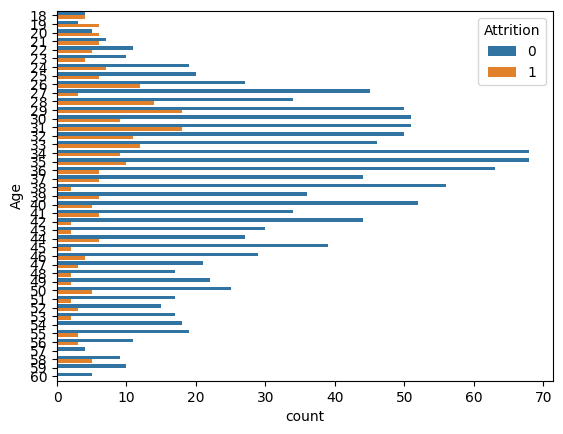

DailyRate


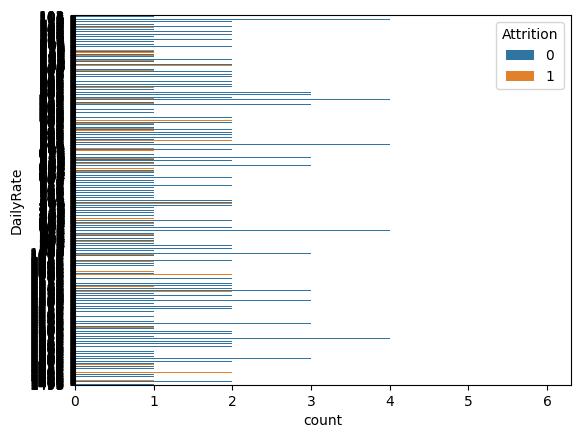

DistanceFromHome


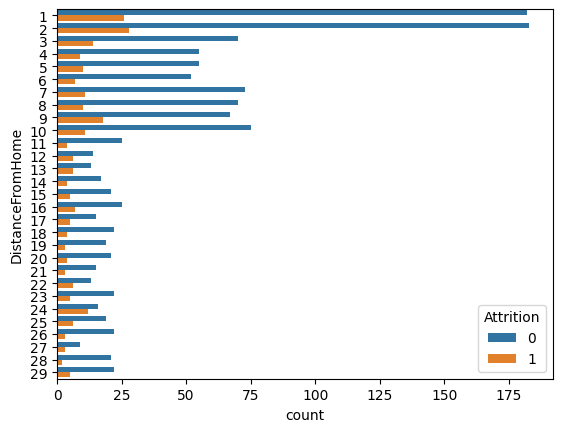

Education


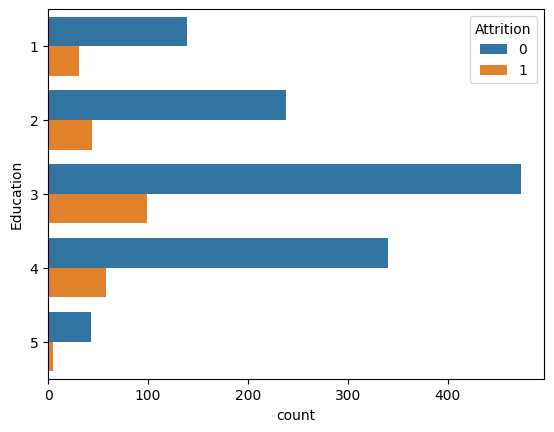

EmployeeCount


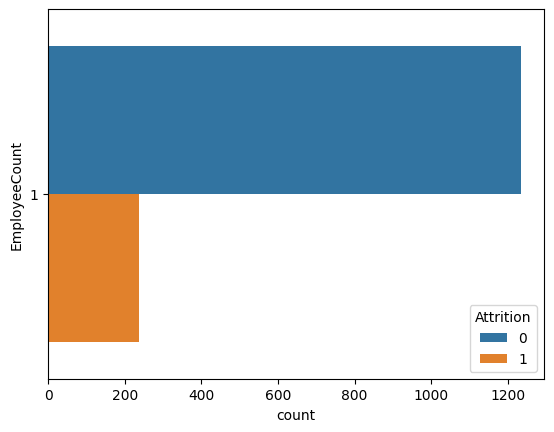

EmployeeNumber


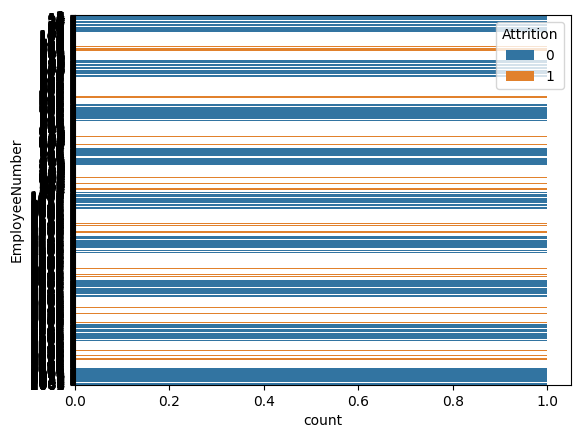

EnvironmentSatisfaction


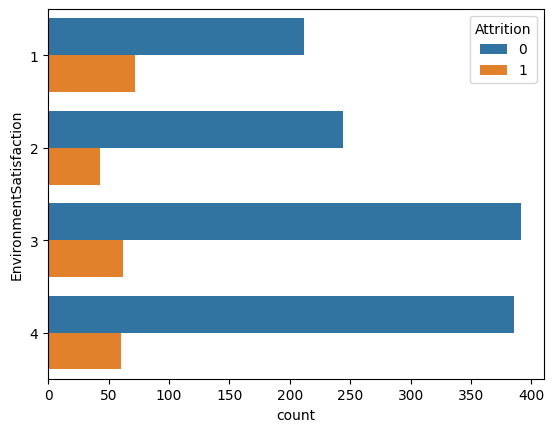

HourlyRate


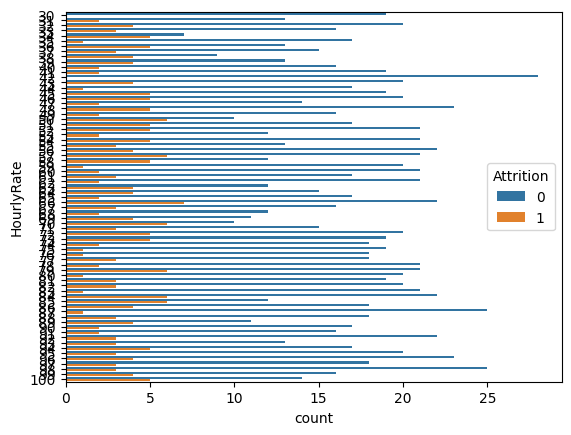

JobInvolvement


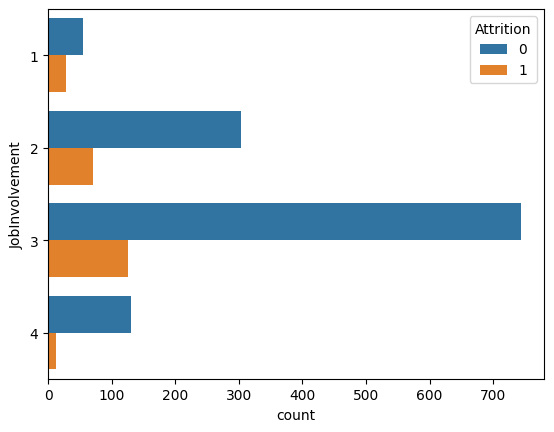

JobLevel


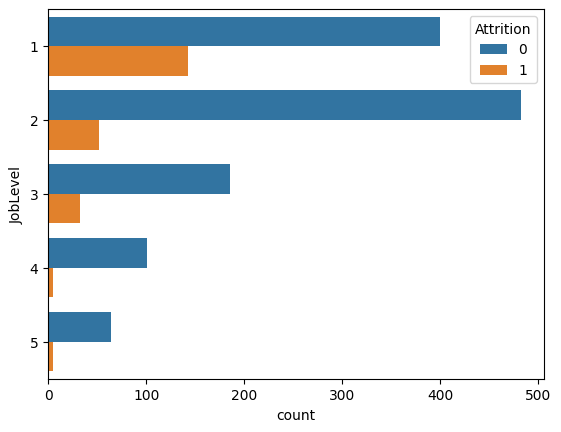

JobSatisfaction


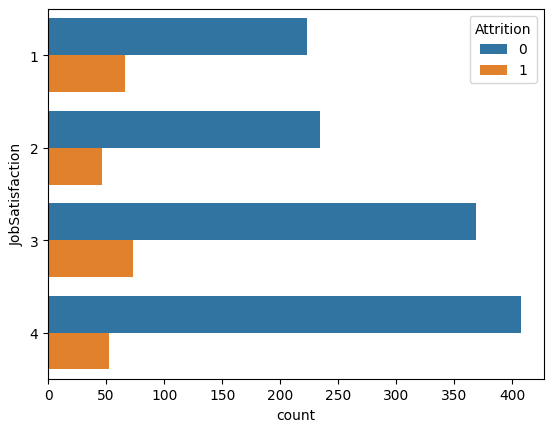

MonthlyIncome


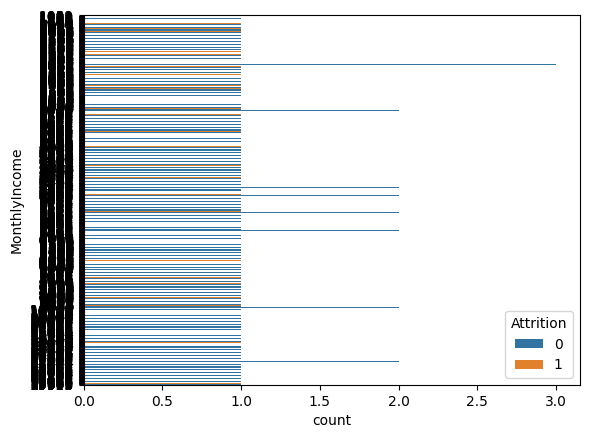

MonthlyRate


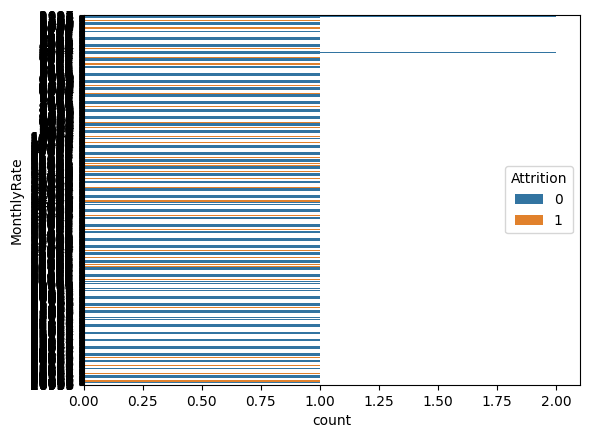

NumCompaniesWorked


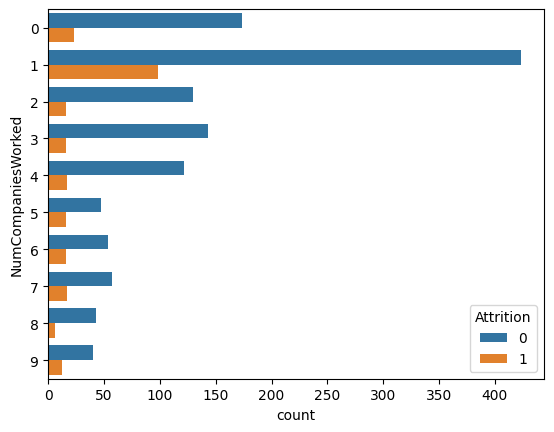

PercentSalaryHike


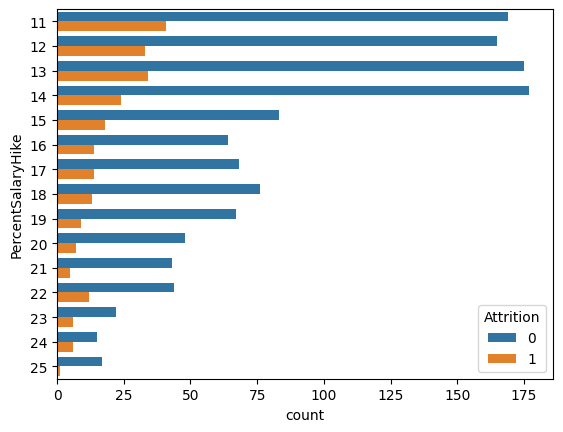

PerformanceRating


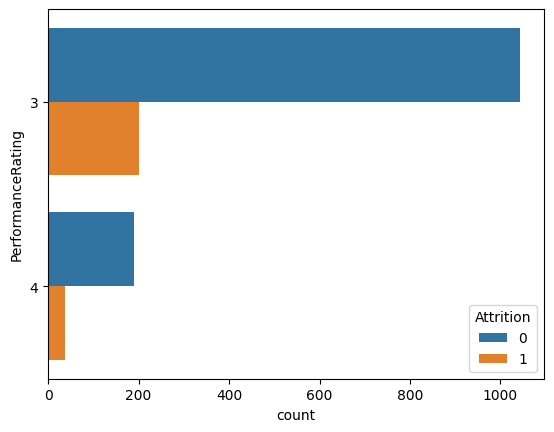

RelationshipSatisfaction


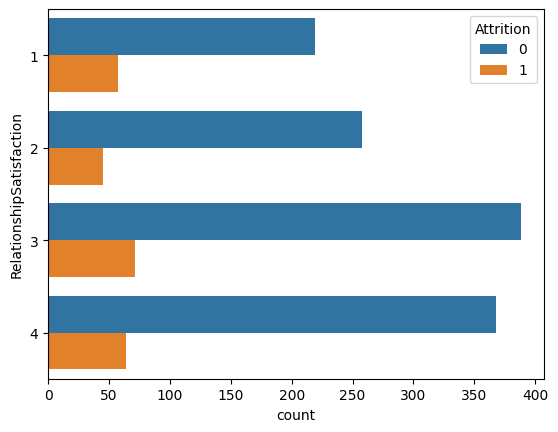

StandardHours


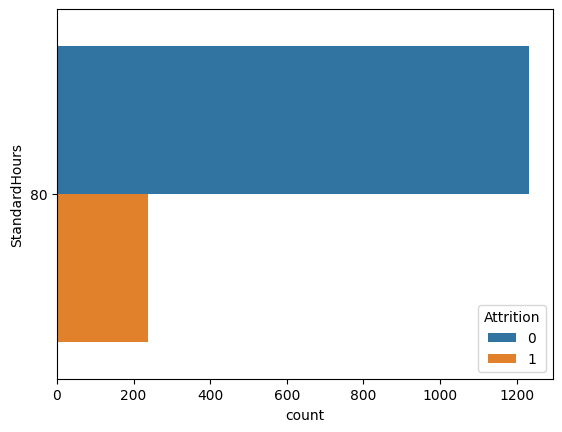

StockOptionLevel


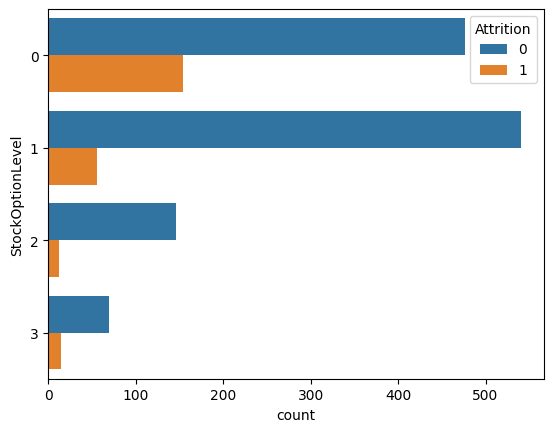

TotalWorkingYears


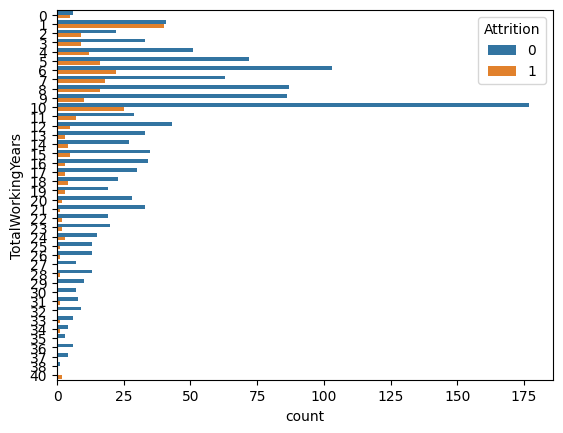

TrainingTimesLastYear


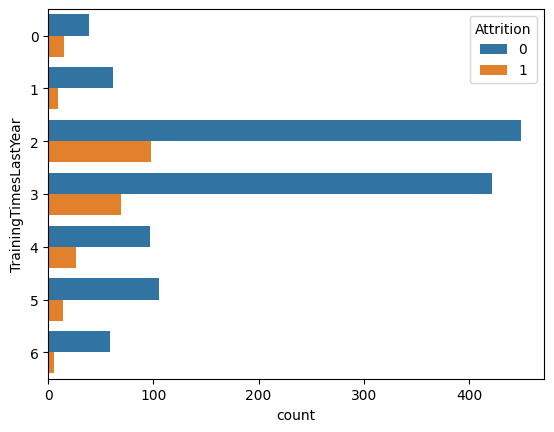

WorkLifeBalance


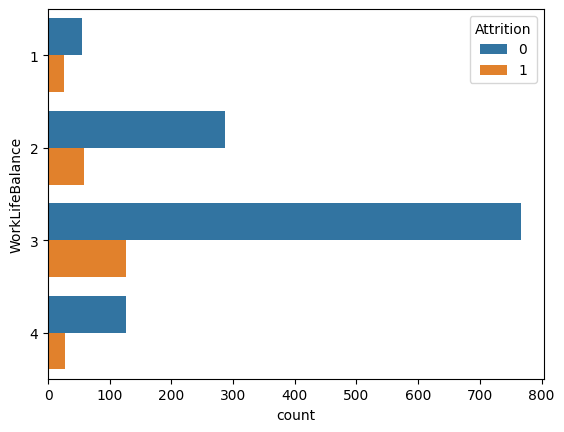

YearsAtCompany


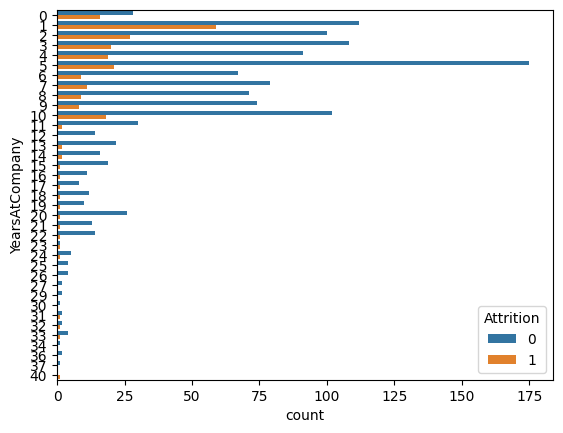

YearsInCurrentRole


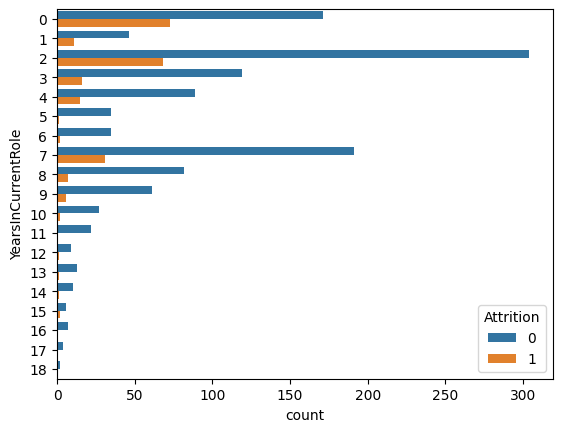

YearsSinceLastPromotion


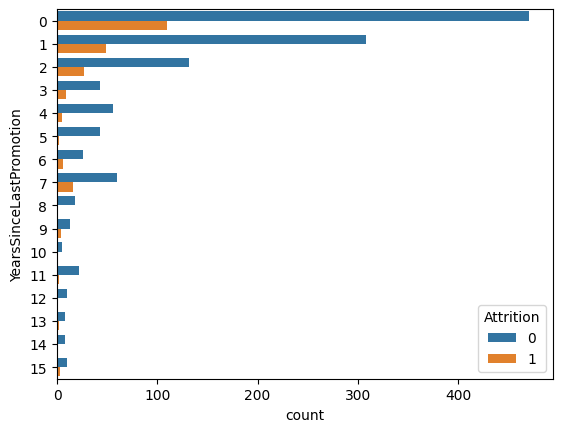

YearsWithCurrManager


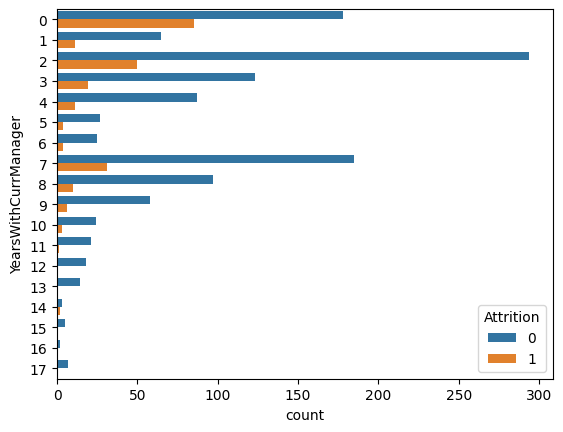

BusinessTravel


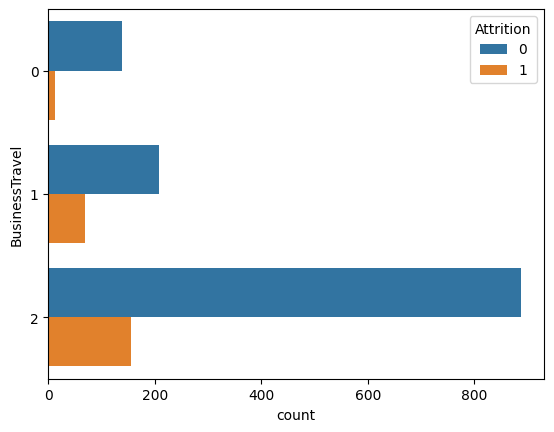

Department


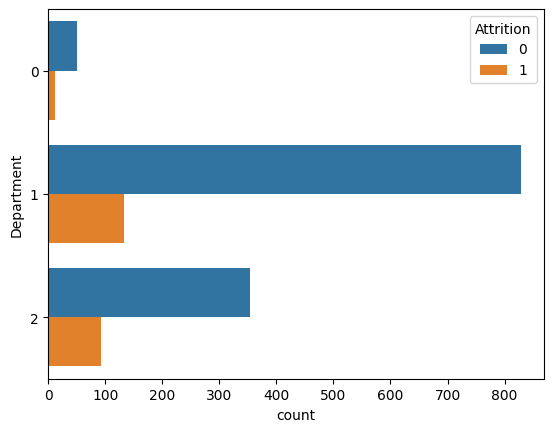

EducationField


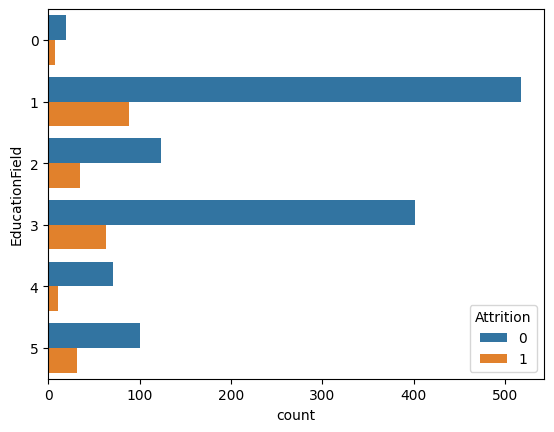

Gender


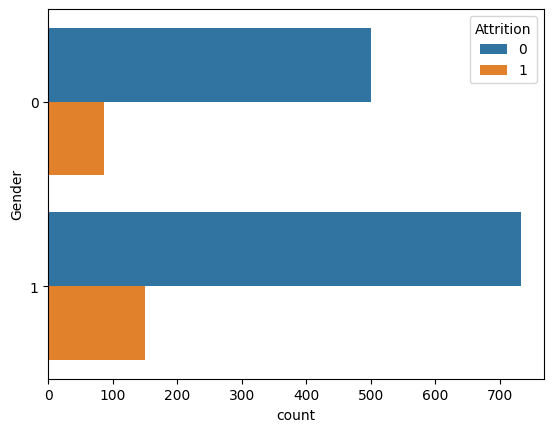

JobRole


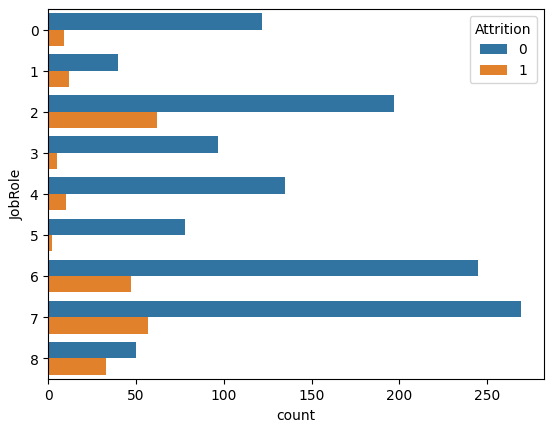

MaritalStatus


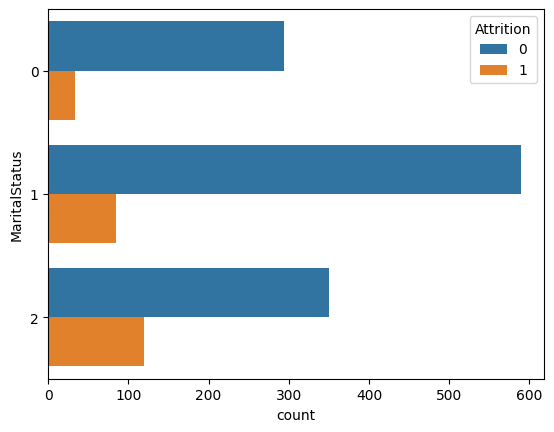

Over18


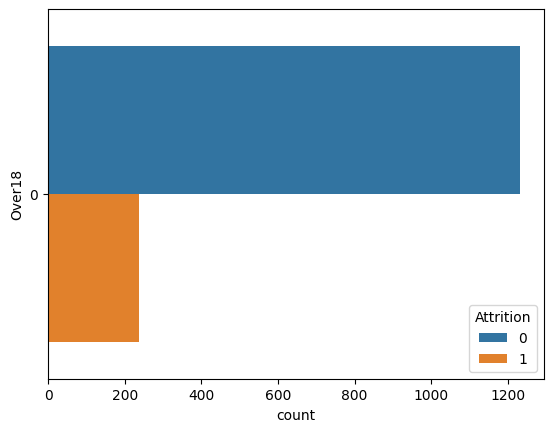

OverTime


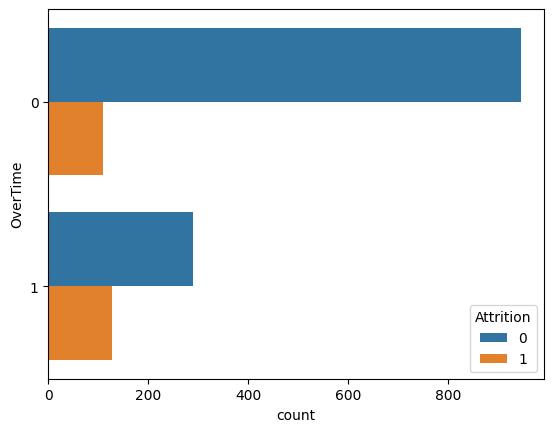

Attrition


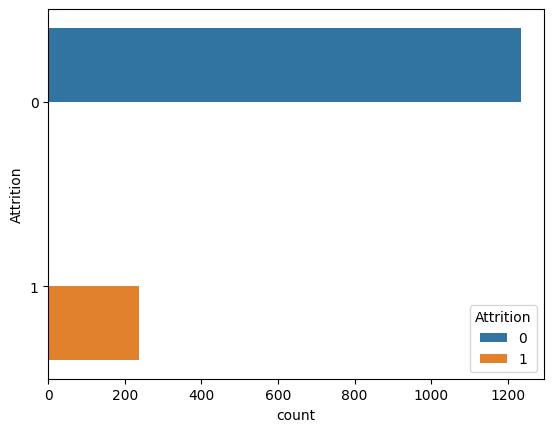

In [21]:
for x in df.columns:
    print(x)
    sns.countplot(y = x, hue = 'Attrition', data = df)
    plt.show()
plt.show()
# sns.countplot(y = 'Department', hue = 'Attrition', data = df)
# plt.show()